In [334]:
import numpy as np
from matplotlib import pyplot as plt

# Exercise 1

1. Dùng Gradient Descent với learning rate là 0.2 với function $f(x)=x^2$. <br>
Gradient của $f(x)$ w.r.t $x$:
$$
\frac{d f(x)}{d x}=2 x
$$
- update $x$ dùng gradient descent: 
$$
x_{\text {mới }}=x_{\text {cũ }}-\text { learning-rate } \times \frac{d f(x)}{d x}
$$
<br>

- Khởi tạo x = 6, learning rate = 0.2, iter 10 lần:

| x    | f(x)'|
| -------- | ------- |
| 3.6  | 0.2×2×6=2.4   |
| 2.16 | 0.2×2×3.6=1.44     |
| ...    | ...    |
| 0.03627    | ...   |

- Khởi tạo x = 6, learning rate = 2, iter 10 lần:

| x    | f(x)'|
| -------- | ------- |
| −18  | 2×2×6=24   |
| 54 | 2×2×(−18)=-72     |
| ...    | ...    |
| 354294    | ...   |

In [335]:
def f(x):
    return np.power(x, 2)


def df(x):
    return np.multiply(x, 2)


def gradient_descent(x, lr, n_iter=10):
    history = [] 

    for _ in range(n_iter):
        gradient = df(x)
        x = x - lr * gradient
        history.append(x)

    return history

## - SMALL LEARNING RATE

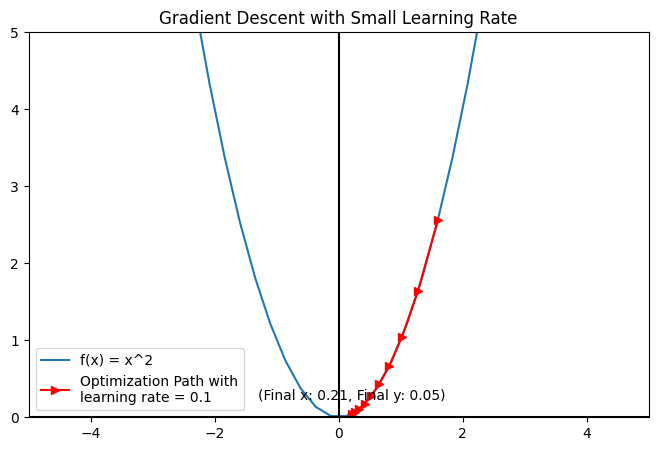

In [336]:
x = np.linspace(-6, 6, 50)
fx = f(x)

# Initialize the starting point and learning rate
small_lr_config = {'x': 2,
                   'lr': 0.1,
                   'n_iter': 10,
                   }
# Run gradient descent
x_history = gradient_descent(**small_lr_config)

# Plot the function and the optimization path
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x, fx, label="f(x) = x^2")
ax.plot(x_history, [f(xi) for xi in x_history],
           c='red', marker='>', label=f"Optimization Path with\nlearning rate = {small_lr_config['lr']}")
ax.set_xlim(-5, 5)
ax.set_ylim(0, 5)
ax.set_title("Gradient Descent with Small Learning Rate")

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

# Annotate the final point
final_x = x_history[-1]
final_y = f(final_x)
ax.annotate(f'(Final x: {final_x:.2f}, Final y: {final_y:.2f})', (final_x, final_y),
            textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()


## - LARGE LEARNING RATE

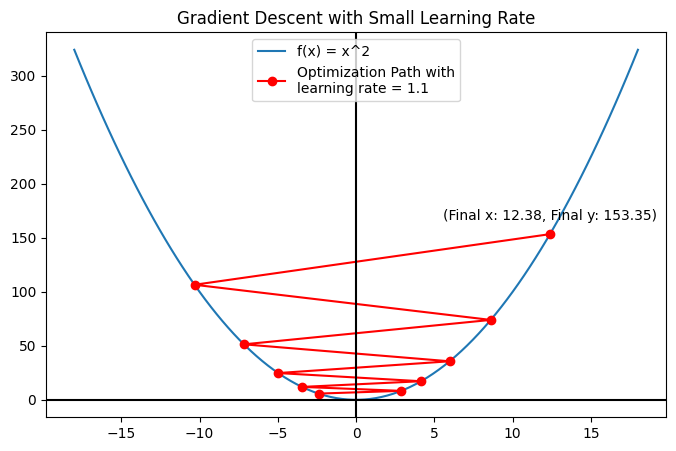

In [337]:
x = np.linspace(-18, 18, 100)
fx = f(x)

# Initialize the starting point and learning rate
large_lr_config = {'x': 2,
                   'lr': 1.1,
                   'n_iter': 10,
                   }
# Run gradient descent
x_history = gradient_descent(**large_lr_config)

# Plot the function and the optimization path
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, fx, label="f(x) = x^2")
ax.plot(x_history, [f(xi) for xi in x_history],
        c='red', marker='o', label=f"Optimization Path with\nlearning rate = {large_lr_config['lr']}")

ax.set_title("Gradient Descent with Small Learning Rate")

plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

# Annotate the final point
final_x = x_history[-1]
final_y = f(final_x)
ax.annotate(f'(Final x: {final_x:.2f}, Final y: {final_y:.2f})', (final_x, final_y),
            textcoords="offset points", xytext=(0, 10), ha='center')

plt.legend()
plt.show()


# Exercise 2

In [338]:
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import SGD
from torch.utils.data import DataLoader

In [339]:
device_count = torch.cuda.device_count()
if device_count > 0:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [340]:
def MSE(prediction, y):
    mse = np.mean((prediction - y) ** 2)
    return mse

def RMSE(prediction, y):
    rmse = np.sqrt(np.mean((prediction - y) ** 2))
    return rmse

def MAE(prediction, y):
    mae = np.mean(np.abs(prediction - y))
    return mae

def MAPE(prediction, y):
    mape = np.mean(np.abs((prediction - y) / y))
    return str(mape)+"%"

In [341]:
url = "https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L1/data_linear.csv"
df_raw = pd.read_csv(url)

In [342]:
df_raw = df_raw.sample(frac=1)

In [343]:
X_train = df_raw['Diện tích'][:24].values.reshape(-1,1)
y_train = df_raw['Giá'][:24].values.reshape(-1,1)
X_test = df_raw['Diện tích'][24:].values.reshape(-1,1)
y_test = df_raw['Giá'][24:].values.reshape(-1,1)

In [344]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [345]:
train_loader = DataLoader(list(zip(X_train_tensor, y_train_tensor)))

In [346]:
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super(SimpleLinearRegression, self).__init__()
        self.linear = nn.Linear(in_features=1, out_features=1)
        self.loss_hist = []

    def forward(self, x):
        out = self.linear(x)
        return out

    def train_model(self, train_loader, num_epochs, device, lr):
        criterion = nn.MSELoss()
        optimizer = SGD(self.parameters(), lr=lr)
        loss_history = []

        self.to(device)

        for epoch in range(num_epochs):
            for inputs, targets in train_loader:
                inputs, targets = inputs.to(device), targets.to(device)

                outputs = self(inputs)
                loss = criterion(outputs, targets)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            self.loss_hist.append(loss.item())
            if epoch % 10 == 0:
                print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
        

In [347]:
model = SimpleLinearRegression()

model.train_model(train_loader, num_epochs=100, device=device, lr=0.00001)

Epoch [1/100], Loss: 15422.9297
Epoch [11/100], Loss: 157.9606
Epoch [21/100], Loss: 157.9545
Epoch [31/100], Loss: 157.9483
Epoch [41/100], Loss: 157.9391
Epoch [51/100], Loss: 157.9299
Epoch [61/100], Loss: 157.9238
Epoch [71/100], Loss: 157.9146
Epoch [81/100], Loss: 157.9084
Epoch [91/100], Loss: 157.9023


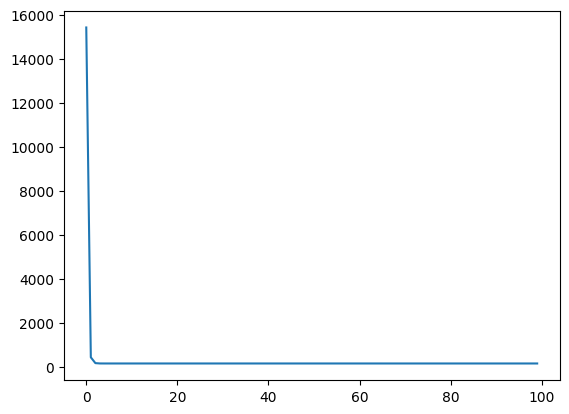

In [348]:
plt.plot(model.loss_hist)

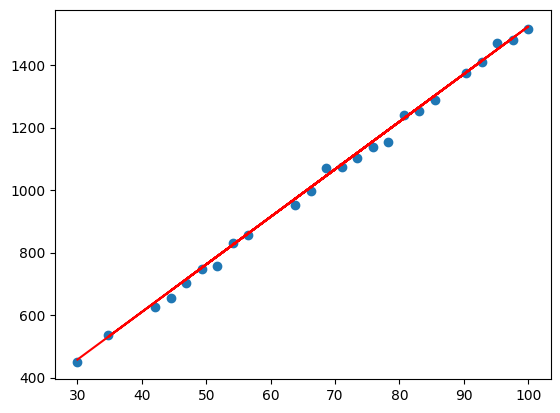

In [349]:
plt.scatter(X_train_tensor.numpy(), y_train_tensor.numpy())
plt.plot(X_train_tensor.numpy(), model(X_train_tensor).detach().numpy(), 'r')

In [350]:
pred = model(X_test_tensor).detach().numpy()
print(f"""{MSE(pred, y_test_tensor.detach().numpy())}
{RMSE(pred, y_test_tensor.detach().numpy())}
{MAE(pred, y_test_tensor.detach().numpy())}
{MAPE(pred, y_test_tensor.detach().numpy())}""")

550.9552612304688
23.472436904907227
22.318349838256836
0.029454371%


## SMALL LEARNING RATE -> CONVERGED

In [351]:
model.train_model(train_loader, num_epochs=100, device=device, lr=0.01)

Epoch [1/100], Loss: nan
Epoch [11/100], Loss: nan
Epoch [21/100], Loss: nan
Epoch [31/100], Loss: nan
Epoch [41/100], Loss: nan
Epoch [51/100], Loss: nan
Epoch [61/100], Loss: nan
Epoch [71/100], Loss: nan
Epoch [81/100], Loss: nan
Epoch [91/100], Loss: nan


## BIG LEARNING RATE -> DIVERGE
